<a href="https://colab.research.google.com/github/rohit9650/ML/blob/master/AutoML/autoML_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# installing H2O
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  The repository located at h2o-release.s3.amazonaws.com is not a trusted or secure host and is being ignored. If this repository is available via HTTPS we recommend you use HTTPS instead, otherwise you may silence this warning and allow it anyway with '--trusted-host h2o-release.s3.amazonaws.com'.
    100% |████████████████████████████████| 120.9MB 214kB/s 
  Stored in directory: /root/.cache/pip/wheels/5e/0b/27/9eb72d708a3e7d1780ba296cf50b165d6d7a8ba6638915d7fe
Successfully built h2o


In [4]:
#importing and intializing
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw3rom13x
  JVM stdout: /tmp/tmpw3rom13x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw3rom13x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_unknownUser_2ny3d7
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [6]:
import os
'''
For the AutoML binary classification demo, we use a subset of the Product 
Backorders dataset. The goal here is to predict whether or not a product
will be put on backorder status, given a number of product metrics such
as current inventory, transit time, demand forecasts and prior sales.
'''
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"

df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
'''
For classification the response should be encoded as categorical(factor
or enum)
'''

df.describe()

Rows:19053
Cols:23




,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.76056264,376.36702881436014,7.706036161335188,48.272345562378625,182.91082769117727,344.739830997743,497.79242114102766,56.11887891670605,168.53445651603428,333.53219965359773,504.2553928515193,48.84070750013117,,2.3114995013908572,-6.519833622001783,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498688,7002.071628662688,6.778665072124189,1465.9992102068293,4304.865591970626,8406.062155159243,12180.570042918358,1544.2177775482573,4581.340080221506,9294.566153218986,14184.14539565363,968.7738680675265,,110.24106014611986,25.975138766871876,25.184497150032527,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


In [0]:
'''
went_on_backorder is already enum type IF it had been 0/1 (int) then
then we'd have to convert the column as follows:  df[y] = df[y].asfactor()

The "sku" column is a unique identifier so we'll want to remove that from
the set of our predictors.
'''

y = 'went_on_backorder'
x = df.columns
x.remove(y)
x.remove('sku')

In [9]:
# Run AutoML

aml = H2OAutoML(max_models=20, seed=1)
aml.train(x = x, y = y, training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
'''
The leader model is stored at aml.leader and the leaderboard is stored at
aml.leaderboard.
'''
lb = aml.leaderboard

In [11]:
lb.head()

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190210_183815,0.951742,0.178411,0.152973,0.224918,0.0505881
XGBoost_grid_1_AutoML_20190210_183815_model_2,0.951328,0.182357,0.173059,0.225147,0.0506912
StackedEnsemble_BestOfFamily_AutoML_20190210_183815,0.950602,0.179387,0.146572,0.224853,0.0505588
XGBoost_2_AutoML_20190210_183815,0.948208,0.17361,0.156971,0.226176,0.0511554
GBM_4_AutoML_20190210_183815,0.948132,0.173882,0.148656,0.226523,0.0513126
XGBoost_1_AutoML_20190210_183815,0.947795,0.173721,0.160198,0.226557,0.051328
XGBoost_grid_1_AutoML_20190210_183815_model_3,0.947083,0.174926,0.154774,0.227078,0.0515646
XGBoost_3_AutoML_20190210_183815,0.947027,0.175105,0.16299,0.226842,0.0514575
XGBoost_grid_1_AutoML_20190210_183815_model_4,0.946514,0.174988,0.14415,0.227095,0.0515723
GBM_3_AutoML_20190210_183815,0.946388,0.176609,0.142449,0.228175,0.0520639


In [12]:
'''
To view the entire leaderboard, specify the rows argument of the head()
method as the total number of rows:
'''
lb.head(rows=lb.nrows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190210_183815,0.951742,0.178411,0.152973,0.224918,0.0505881
XGBoost_grid_1_AutoML_20190210_183815_model_2,0.951328,0.182357,0.173059,0.225147,0.0506912
StackedEnsemble_BestOfFamily_AutoML_20190210_183815,0.950602,0.179387,0.146572,0.224853,0.0505588
XGBoost_2_AutoML_20190210_183815,0.948208,0.17361,0.156971,0.226176,0.0511554
GBM_4_AutoML_20190210_183815,0.948132,0.173882,0.148656,0.226523,0.0513126
XGBoost_1_AutoML_20190210_183815,0.947795,0.173721,0.160198,0.226557,0.051328
XGBoost_grid_1_AutoML_20190210_183815_model_3,0.947083,0.174926,0.154774,0.227078,0.0515646
XGBoost_3_AutoML_20190210_183815,0.947027,0.175105,0.16299,0.226842,0.0514575
XGBoost_grid_1_AutoML_20190210_183815_model_4,0.946514,0.174988,0.14415,0.227095,0.0515723
GBM_3_AutoML_20190210_183815,0.946388,0.176609,0.142449,0.228175,0.0520639


In [0]:
# Ensemble Exploration
'''
let's take a peek inside the Stacked Ensemble "All Models" model.
The "All Models" ensemble is an ensemble of all of the individual models
in the AutoML run. This is often the top performing model on the
leaderboard.
'''

# get model_id of all models in leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# get the All Models Stacked Ensemble Model
se = h2o.get_model([x for x in model_ids 
                    if "StackedEnsemble_AllModels" in x][0])

'''
metalearner : combine algorithm in the  ensemble
'''
metalearner = h2o.get_model(se.metalearner()['name'])

In [14]:
'''
how much each base learner contributing to ensemble
'''
metalearner.coef_norm()

{'DRF_1_AutoML_20190210_183815': 0.0995458930058759,
 'DeepLearning_1_AutoML_20190210_183815': 0.0,
 'DeepLearning_grid_1_AutoML_20190210_183815_model_1': 0.0,
 'DeepLearning_grid_1_AutoML_20190210_183815_model_2': 0.0,
 'GBM_1_AutoML_20190210_183815': 0.0,
 'GBM_2_AutoML_20190210_183815': 0.0,
 'GBM_3_AutoML_20190210_183815': 0.0,
 'GBM_4_AutoML_20190210_183815': 0.019424663523772832,
 'GBM_5_AutoML_20190210_183815': 0.10175750735737611,
 'GBM_grid_1_AutoML_20190210_183815_model_1': 0.16640994118826666,
 'GBM_grid_1_AutoML_20190210_183815_model_2': 0.08876070230403744,
 'GLM_grid_1_AutoML_20190210_183815_model_1': 0.1191946418980572,
 'Intercept': -2.959731688875367,
 'XGBoost_1_AutoML_20190210_183815': 0.0,
 'XGBoost_2_AutoML_20190210_183815': 0.0,
 'XGBoost_3_AutoML_20190210_183815': 0.0,
 'XGBoost_grid_1_AutoML_20190210_183815_model_1': 0.0,
 'XGBoost_grid_1_AutoML_20190210_183815_model_2': 0.3917445098126565,
 'XGBoost_grid_1_AutoML_20190210_183815_model_3': 0.0,
 'XGBoost_grid_1_

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


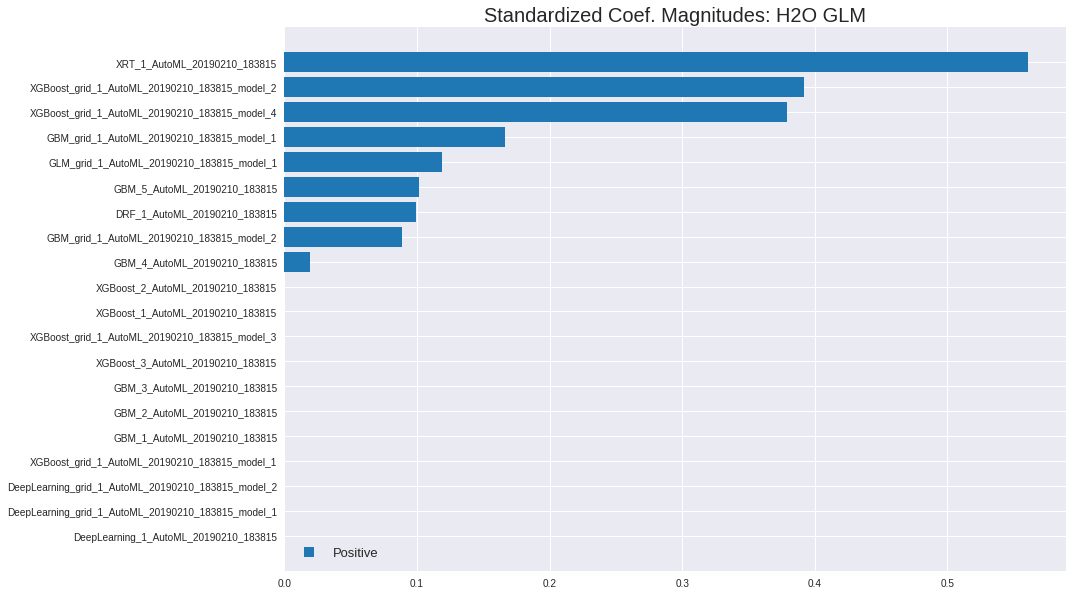

In [16]:
%matplotlib inline
metalearner.std_coef_plot()

In [17]:
# Saving Model

h2o.save_model(aml.leader, path='./product_backorders_model_bin')

# Download

aml.leader.download_mojo(path='./')

'/content/StackedEnsemble_AllModels_AutoML_20190210_183815.zip'